<h1><center> Customer Classification </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

In this project, __K-Nearest Neighbors__ is used, which is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.  
  
In this project, a customer dataset is used to apply customer classification. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Describe</li>
                <li>Visualization</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>Model Development</a>
            <ul>
                <li>Pre-processing</li>
                <li>KNN</li>
                <li>Decision Tree</li>
                <li>SVM</li>
                <li>Logistic Regression</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The project focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. 

In [1]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. Download Data

In [3]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'

In [4]:
#download the data
customer_data = pd.read_csv(file_name)

In [5]:
# size of data 
NR = np.size(customer_data,0)
NC = np.size(customer_data,1)
print('There are ', NR, ' samples of data and ', NC, ' properties')

There are  1000  samples of data and  12  properties


In [6]:
#display the first 10 rows of data
customer_data.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


There are 12 columns in this dataset. 

## 2. Data Wrangling

In [7]:
#Evaluating the missing data
missing_data = customer_data.isnull()
missing_data.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


"True" measn the data is missing. From the first 10 rows, there are no missing data. 

In [8]:
#Here use info() to count non-null values or missing values in each column
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


Nice, data look all clean. 

Data types look all correct. 

## 3. Exploratory Data Analysis

Data Exploratory or data analysis is requried to find the features or characteristics of the data. 

In [9]:
customer_data.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [10]:
customer_data['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [32]:
customer_data.groupby('custcat').mean()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
custcat,,,,,,,,,,,
1,2.090226,24.676692,39.657895,0.417293,9.390977,54.759398,2.364662,8.484962,0.041353,0.507519,2.199248
2,1.963134,43.345622,41.788018,0.529954,12.571429,74.834101,2.958525,10.576037,0.032258,0.548387,2.336406
3,1.996441,40.078292,44.430605,0.494662,13.380783,89.032028,2.153025,14.309609,0.078292,0.505338,2.227758
4,2.029661,35.144068,40.601695,0.550847,10.868644,92.000000,3.368644,10.228814,0.029661,0.512712,2.597458


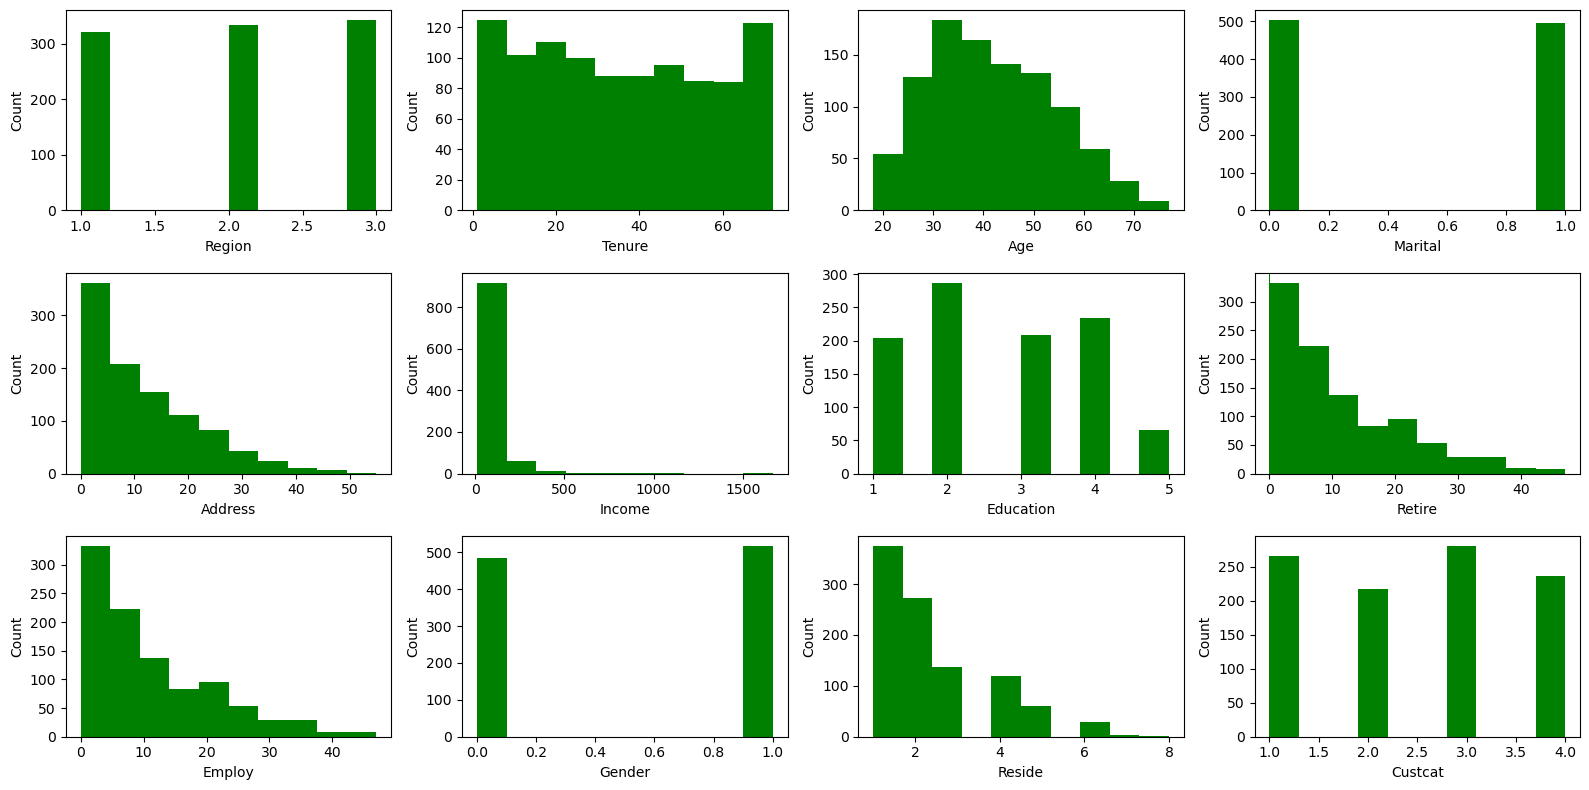

In [11]:
#plot using histogram
plt.figure(figsize=(16,8))
plt.subplot(3,4,1)
plt.hist(customer_data['region'], histtype='bar', facecolor='g')
plt.xlabel('Region')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,2)
plt.hist(customer_data['tenure'], histtype='bar', facecolor='g')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,3)
plt.hist(customer_data['age'], histtype='bar', facecolor='g')
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,4)
plt.hist(customer_data['marital'], histtype='bar', facecolor='g')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,5)
plt.hist(customer_data['address'], histtype='bar', facecolor='g')
plt.xlabel('Address')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,6)
plt.hist(customer_data['income'], histtype='bar', facecolor='g')
plt.xlabel('Income')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,7)
plt.hist(customer_data['ed'], histtype='bar', facecolor='g')
plt.xlabel('Education')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,8)
plt.hist(customer_data['employ'], histtype='bar', facecolor='g')
plt.xlabel('Employ')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,8)
plt.hist(customer_data['retire'], histtype='bar', facecolor='g')
plt.xlabel('Retire')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,9)
plt.hist(customer_data['employ'], histtype='bar', facecolor='g')
plt.xlabel('Employ')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,10)
plt.hist(customer_data['gender'], histtype='bar', facecolor='g')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,11)
plt.hist(customer_data['reside'], histtype='bar', facecolor='g')
plt.xlabel('Reside')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(3,4,12)
plt.hist(customer_data['custcat'], histtype='bar', facecolor='g')
plt.xlabel('Custcat')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

### 4. Model Development

In this section, a k-means model is developed to cluster customers. It would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

#### 4.0 Data Preprocessing

Data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence

In [12]:
X = customer_data[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values

Y = customer_data['custcat'].values

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [14]:
x_train_norm = preprocessing.StandardScaler().fit(x_train).transform(x_train.astype(float))

#### 4.1 K nearest neighbor (KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 4).fit(x_train_norm,y_train)

In [16]:
x_test_norm = preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))

In [17]:
yhat = neigh.predict(x_test_norm)

In [18]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.33


K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [19]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_norm,y_train)
    yhat=neigh.predict(x_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.32 , 0.315, 0.335, 0.33 , 0.34 , 0.335, 0.35 , 0.34 , 0.335])

All test accruacy are below 40%. 

__Plot the model accuracy for a different number of neighbors.__

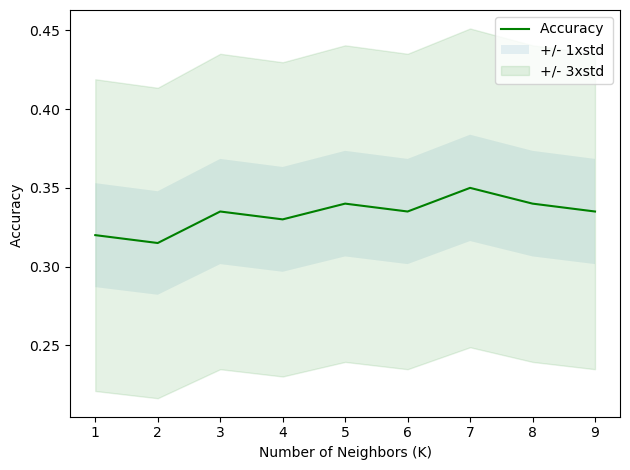

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.35 with k= 7


#### 4.2 SVM

In [22]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train_norm, y_train) 

SVC()

In [23]:
yhat = clf.predict(x_test_norm)

In [24]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(x_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.52375
Test set Accuracy:  0.4


#### 4.3 Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_sample_weight

w_train = compute_sample_weight('balanced', y_train)
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

sklearn_dt.fit(x_train_norm, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [26]:
yhat = sklearn_dt.predict(x_test_norm)

In [27]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, sklearn_dt.predict(x_train_norm)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.4525
Test set Accuracy:  0.37


#### 4.4 Softmax Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(x_train_norm, y_train)

In [29]:
probability=lr.predict_proba(x_test_norm)
probability_train=lr.predict_proba(x_train_norm)

In [30]:
softmax_prediction=np.argmax(probability,axis=1)+1
softmax_prediction_train=np.argmax(probability_train,axis=1)+1

In [31]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, softmax_prediction_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, softmax_prediction))

Train set Accuracy:  0.42625
Test set Accuracy:  0.42


__Compared the above four models, the accuracies are all below 50%.__ One possible reason is the customer segmentation is not dinstict enough to group those customers. 